# View the Spectrum model in prospector/fsps Spectrum SPEC560

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023-06-26
- update : 2023-06-26

The good way to query FSPS

In [1]:
import time, sys, os
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



import re
import h5py
import pandas as pd
%matplotlib inline

# re-defining plotting defaults
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})

In [2]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])

In [3]:
from astropy import constants as const
from astropy import units as u

In [4]:
import fsps

# Constants

In [5]:
Wavelength_normalisation = 9000.0

# read StarLight Spectra

In [6]:
input_SLfile_h5  = '../../../../QueryCatalogs/data/SLspectra.hdf5'

In [7]:
with h5py.File(input_SLfile_h5, 'r') as hf:
    data_in = hf['flambda'][:]
    wl_in = hf['wl'][:]
    #target = hf['quantile'][:]

    # other data
    redshift_sl = hf['redshift'][:]
    Rmag_sl = hf['Rmag'][:]
    RT_sl = hf['RT'][:]
    RV_sl = hf['RV'][:]
    ra_sl = hf['ra'][:]
    dec_sl = hf['dec'][:]
    #fracinfbalmer = hf['fracinfbalmer'][:]
    num_sl = hf['num'][:]


In [8]:
spectra_sl = data_in
wavelengths_sl = wl_in

In [9]:
spectra_sl.shape

(550, 12000)

In [10]:
C = 2.99792458e-2 # Angstropersec/s

In [11]:
spectra_sl_fnu = spectra_sl*wavelengths_sl**2/C

In [12]:
selected_num = 560

In [13]:
index_inputsl = np.where(num_sl == selected_num)[0][0]

In [14]:
fnu_sl_selected = spectra_sl_fnu[index_inputsl,:] 

In [15]:
fnu0 = np.interp(Wavelength_normalisation , wavelengths_sl,fnu_sl_selected)

In [16]:
fnu_sl_selected /= fnu0 

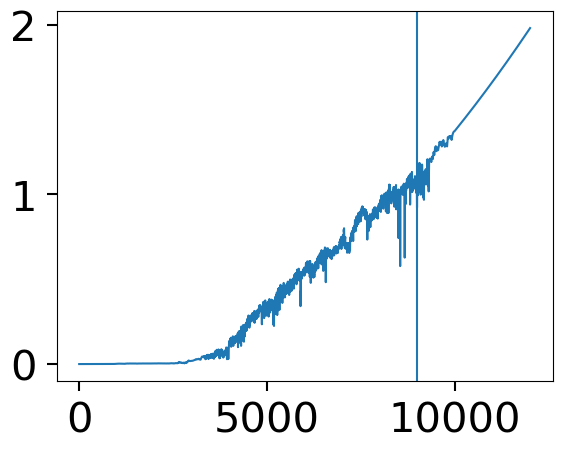

In [17]:
plt.plot(wavelengths_sl,fnu_sl_selected )
plt.axvline(Wavelength_normalisation)

# FSPS

In [18]:
sps = fsps.StellarPopulation(zcontinuous=1)
ilib, slib, dlib = sps.libraries

In [19]:
sps.params['sfh'] = 4
sps.params['tau'] = 13.79
sps.params['logzsol'] = -0.682
sps.params['dust_type'] = 4  # kriek and Conroy (4)
sps.params['imf_type'] = 2  # kroupa
sps.params['imf3'] = 2.3
sps.params["dust2"] = 0.906

In [20]:
N = 10
dust = np.linspace(0,2,N)
color = cm.rainbow(np.linspace(0, 1, N))

In [21]:
#sps.get_spectrum?

## Query luminosity per Hz

      peraa = False (default)

In [22]:
list_wl = []
list_spec = []
for idx in range(N):
    sps.params["dust2"]  = dust[idx]
    wspec, spectr  = sps.get_spectrum(tage=13.7)
    list_wl.append(wspec)
    list_spec.append(spectr)

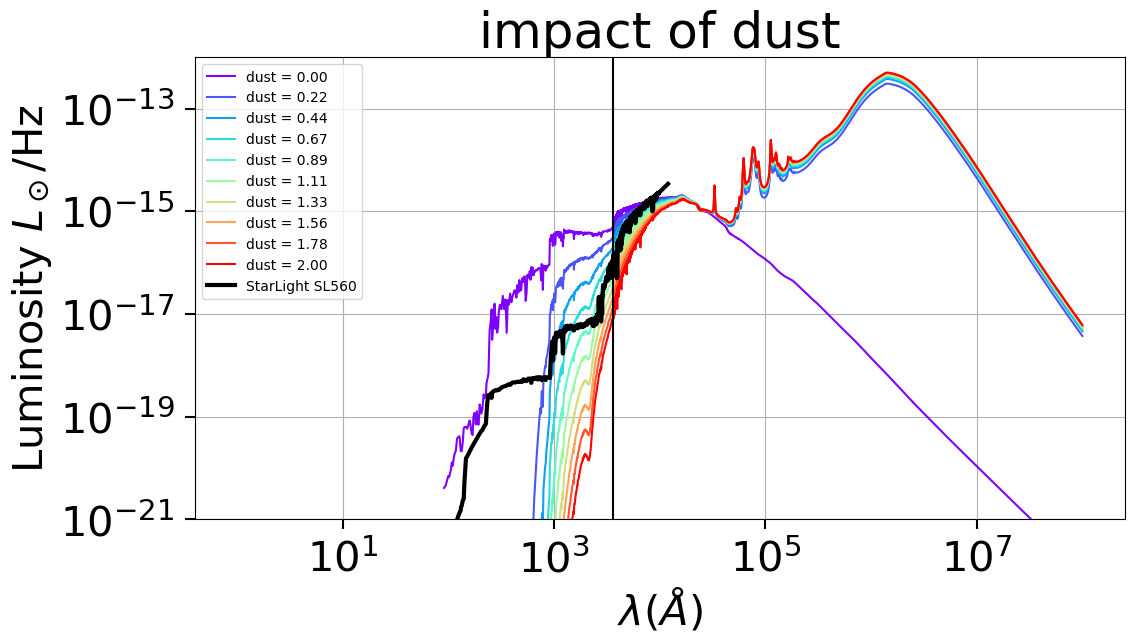

In [23]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.loglog(list_wl[idx],list_spec[idx],color=color[idx],label=label)
    
    if idx==0:
        fnu0 = np.interp(Wavelength_normalisation ,list_wl[idx],list_spec[idx])

ax.loglog(wavelengths_sl,fnu_sl_selected*fnu0,label="StarLight SL560",color="k",lw=3)

ax.grid()
ax.set_ylim(1e-21,1e-12)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Luminosity $L_\odot/\mathrm{Hz}$")
ax.set_title("impact of dust")
ax.axvline(3646,color='k')


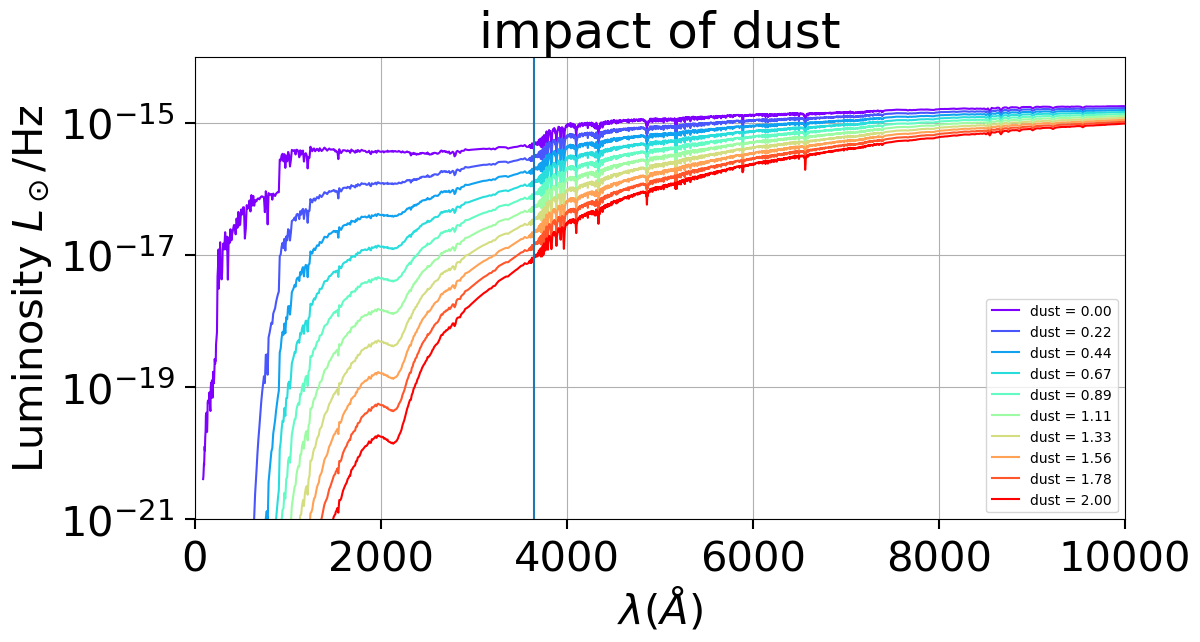

In [24]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.semilogy(list_wl[idx],list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-21,1e-14)
ax.set_xlim(0,10000)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Luminosity $L_\odot/\mathrm{Hz}$")
ax.set_title("impact of dust")
ax.axvline(3646)

In [25]:
# sps.get_spectrum?

## Query luminosity per Angstroms

    peraa = True

In [26]:
list_wl = []
list_spec = []
for idx in range(N):
    sps.params["dust2"]  = dust[idx]
    wspec, spectr  = sps.get_spectrum(tage=13.7,peraa=True)
    list_wl.append(wspec)
    list_spec.append(spectr)
    

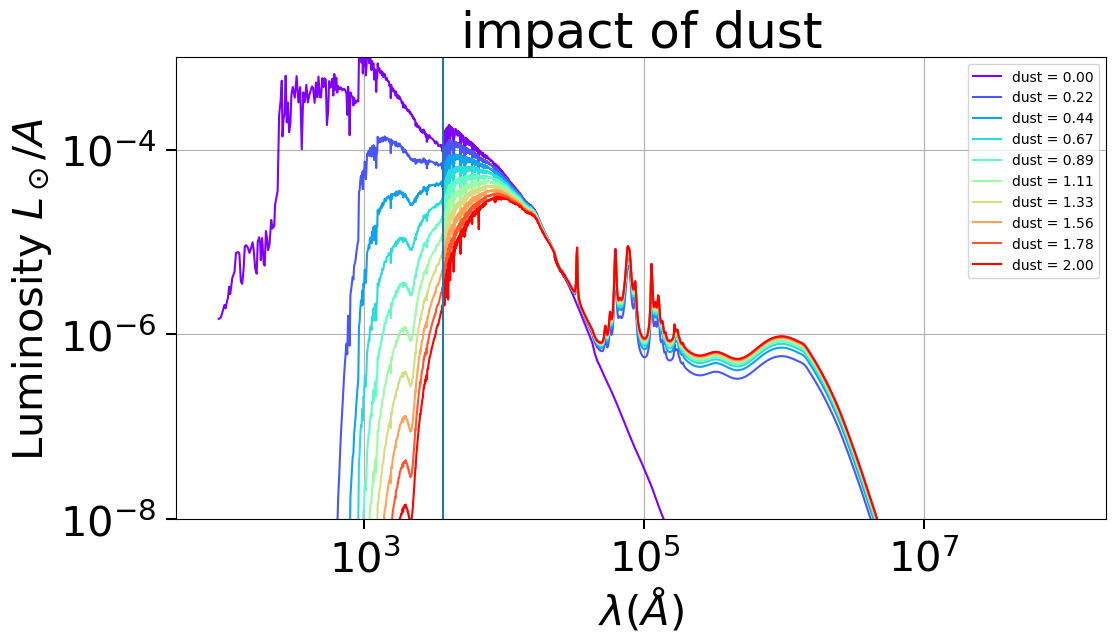

In [27]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.loglog(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-8,1e-3)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Luminosity $L_\odot/A$")
ax.set_title("impact of dust")
ax.axvline(3646)

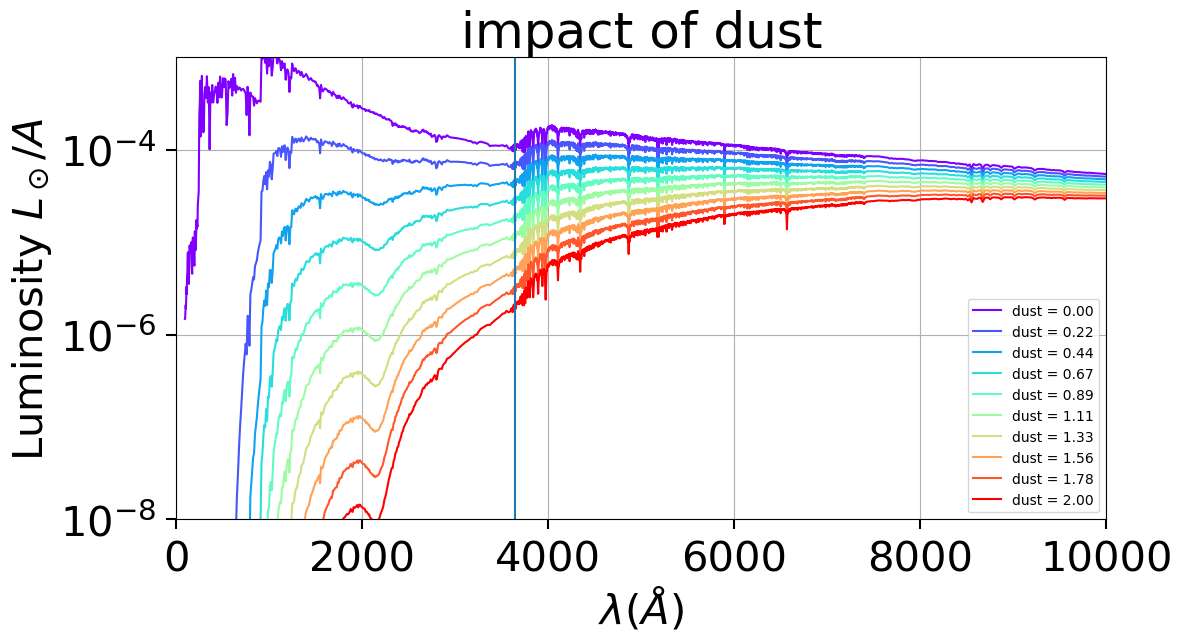

In [28]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.semilogy(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(0,10000)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Luminosity $L_\odot/A$")
ax.set_title("impact of dust")
ax.axvline(3646)